In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns=['Id'], axis=1)

In [4]:
df.head()
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
change={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [8]:
df=df.replace(change)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_5664\3941066338.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(change)


In [9]:
print(df.head())
print(df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2


In [10]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #independent variable
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y=df['Species']    #dependent variable
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

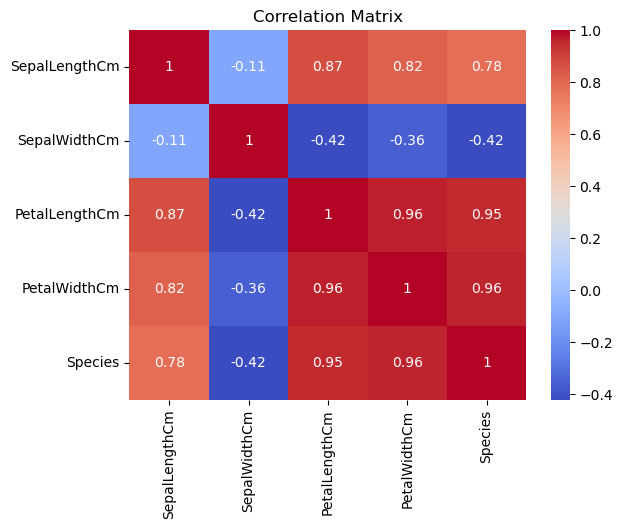

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Feature         VIF
0  SepalLengthCm  264.745711
1   SepalWidthCm   97.111606
2  PetalLengthCm  173.968965
3   PetalWidthCm   55.488689


In [15]:
df.duplicated().sum()

3

In [16]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df = df.drop(columns=['PetalWidthCm'])

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [20]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [21]:
y=df['Species']    
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model=LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=200)
model.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [24]:
y_prediction = model.predict(X_test)

In [25]:
y_prediction
model_accuracy = accuracy_score(y_test, y_prediction)


In [26]:
f'model accuracy is after droping petalwidthcm :{model_accuracy}'

'model accuracy is after droping petalwidthcm :0.9'

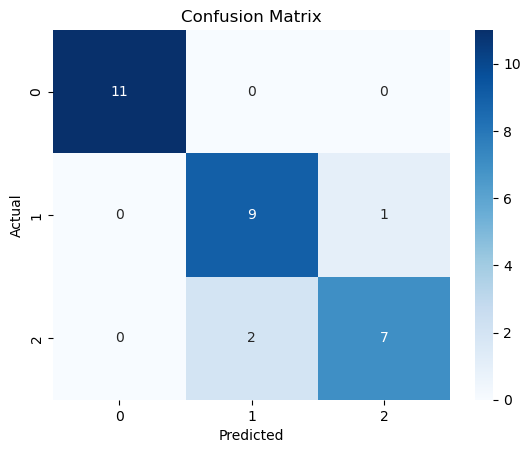

In [27]:
confusion= confusion_matrix(y_test, y_prediction)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')#, xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.90      0.86        10
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

